<a href="https://colab.research.google.com/github/LoniQin/deep_learning_notebooks/blob/master/tensorflow/Kaggle_Competition_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import pandas as pd

## Loading the data

In [ ]:
train = np.loadtxt(open('/kaggle/input/digit-recognizer/train.csv', 'r'), delimiter=',', skiprows=1, dtype='float32')
test = np.loadtxt(open('/kaggle/input/digit-recognizer/test.csv', 'r'), delimiter=',', skiprows=1, dtype='float32')
train_images = train[:, 1:].reshape((train.shape[0], 28, 28, 1)) / 255.0
train_labels = train[:, 0].astype(np.uint8)
test_images = test.reshape((test.shape[0], 28, 28, 1)) / 255.0

## Building and compiling the model

In [ ]:
def get_model():
    model = Sequential([
        Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
        MaxPooling2D(2, 2),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        BatchNormalization(),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
model = get_model()

## Displaying structure of the model
We can use summary method to show structure of the model.

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 16)        64        
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 32)         

## Creating Model Checkpoint
Create a Model Checkpoint to save weights that has the best validation accuracy. So we can use it to generate the best result.

In [ ]:
checkpoint_filepath = "best_checkpoint"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

## Creating Early Stopping Callback
In order to save time, we want to stop the training when the model stops improving. In this senario. We can use Earaly Stoppping 

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

## Training the Model
Now we train the model with the training dataset for 50 epochs. We set the validation_split parameter to 0.15. We pass the Model CheckPoint to save the best weights.

In [ ]:
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.15, callbacks=[model_checkpoint_callback, early_stopping])

Epoch 1/50
1116/1116 [==============================] - 4s 3ms/step - loss: 0.5818 - accuracy: 0.8120 - val_loss: 0.0933 - val_accuracy: 0.9686
Epoch 2/50
1116/1116 [==============================] - 3s 3ms/step - loss: 0.1427 - accuracy: 0.9549 - val_loss: 0.0869 - val_accuracy: 0.9743
Epoch 3/50
1116/1116 [==============================] - 4s 3ms/step - loss: 0.1058 - accuracy: 0.9660 - val_loss: 0.0533 - val_accuracy: 0.9833
Epoch 4/50
1116/1116 [==============================] - 3s 3ms/step - loss: 0.0824 - accuracy: 0.9731 - val_loss: 0.0557 - val_accuracy: 0.9840
Epoch 5/50
1116/1116 [==============================] - 3s 3ms/step - loss: 0.0772 - accuracy: 0.9749 - val_loss: 0.0506 - val_accuracy: 0.9863
Epoch 6/50
1116/1116 [==============================] - 4s 3ms/step - loss: 0.0719 - accuracy: 0.9760 - val_loss: 0.0439 - val_accuracy: 0.9873
Epoch 7/50
1116/1116 [==============================] - 4s 3ms/step - loss: 0.0640 - accuracy: 0.9790 - val_loss: 0.0499 - val_accuracy:

## Plot the learning curve

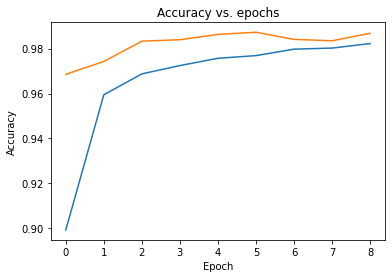

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

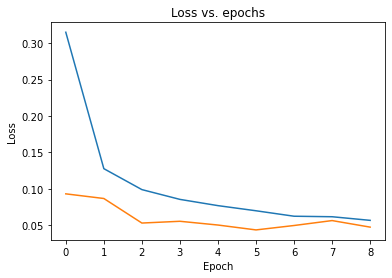

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

## Creating the Model again with best weight

In [ ]:
model = get_model()
model.load_weights(checkpoint_filepath)

## Predicting the data

In [ ]:
test_labels = np.argmax(model.predict(test_images), axis=-1)
print(test_labels.shape)

(28000,)


Now we print first 100 item of test_labels.

In [ ]:
print(test_labels[:100])

[2 0 9 9 3 7 0 3 0 3 5 7 4 0 4 3 3 1 9 0 9 1 1 5 7 4 2 7 4 7 7 5 4 2 6 2 5
 5 1 6 7 7 4 9 8 7 8 2 6 7 6 8 8 3 8 2 1 2 2 0 4 1 7 0 0 0 1 9 0 1 6 5 8 8
 2 8 9 9 2 3 5 4 1 0 9 2 4 3 6 7 2 0 6 6 1 4 3 9 7 4]


## Sumbit the data

In [ ]:
image_ids = np.arange(1, test_labels.shape[0]+1)
result = np.concatenate((image_ids.reshape(image_ids.shape[0], 1), test_labels.reshape(test_labels.shape[0], 1)), axis=1)
df = pd.DataFrame(result, columns=["ImageId", "Label"], dtype='int')
df.to_csv("submission.csv", index=False)